# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama:Annisa Dewiyanti
- Email:annisadewiyanti6@gmail.com
- Id Dicoding:andwynt

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

Melihat 5 baris teratas dari dataset

In [2]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Melihat info dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Mengecek missing values pada setiap kolom

In [4]:
missing_values = df.isnull().sum()
missing_values

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Mengecek duplikasi pada dataset

In [5]:
duplicate_count = df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


## Analisis Distribusi Target

Analisis distribusi kelas 0 dan 1 pada target [Attrition]

In [6]:
# Distribusi variabel target (Attrition)
attrition_counts = df['Attrition'].value_counts()
attrition_counts

,count
Attrition,
0.0,879
1.0,179


In [7]:
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100
attrition_percentage


,proportion
Attrition,
0.0,83.081285
1.0,16.918715


/tmp/ipython-input-2830258907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette="Blues")


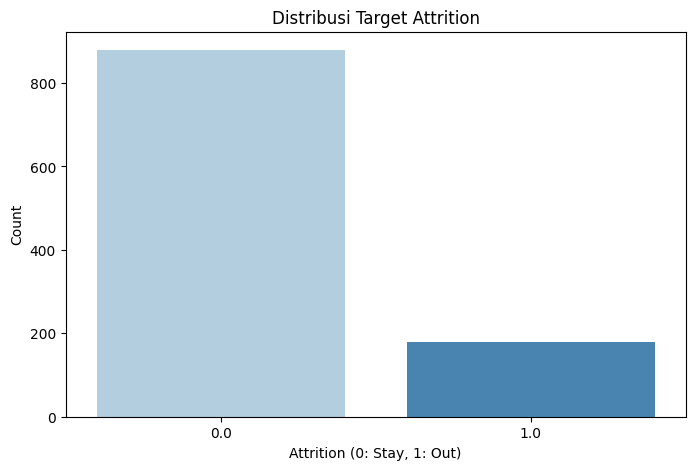

In [8]:
# Visualisasi Distribusi Target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Attrition', palette="Blues")
plt.title("Distribusi Target Attrition")
plt.xlabel("Attrition (0: Stay, 1: Out)")
plt.ylabel("Count")
plt.show()

**Distribusi Attrition:**

* 0 (Tidak Keluar): 83.08%
* 1 (Keluar): 16.92%

Artinya, sebagian besar karyawan tidak keluar, tetapi Attrition tetap signifikan pada 16.92% karyawan.

##Analisis Fitur Numerik

Melihat Distribusi pada setiap Kolom Numerik

In [9]:
# Distribusi Variabel Numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['EmployeeId',
 'Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
numerical_description = df[numerical_columns].describe()
numerical_description

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Visualisasi Distribusi Kolom Numerik menggunakan histplot

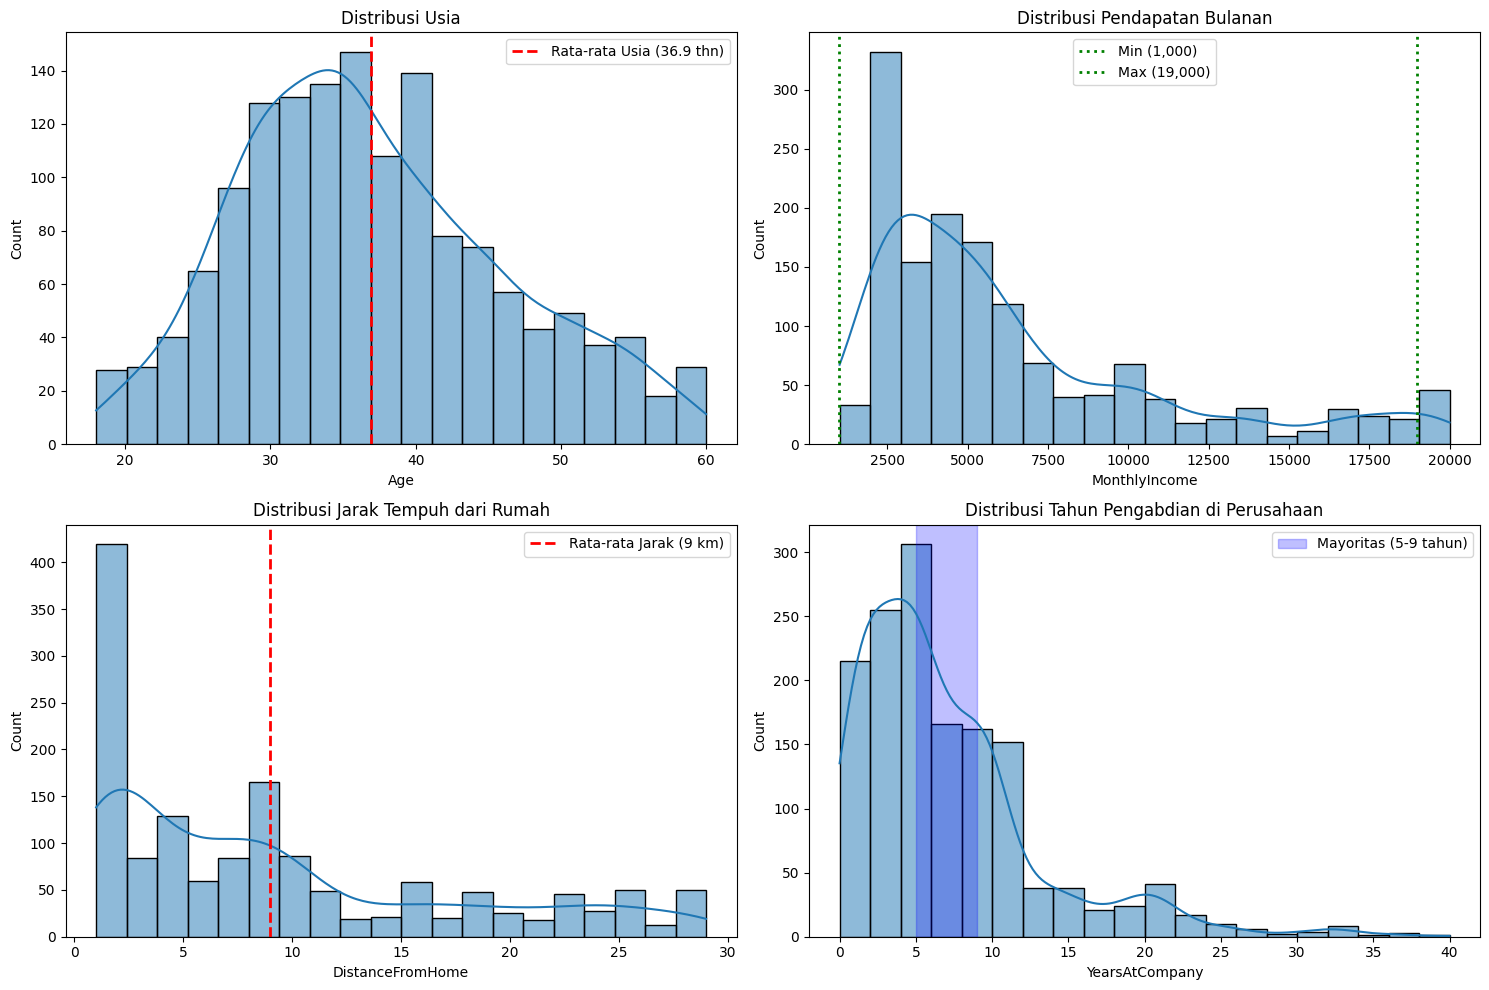

In [11]:
# Visualisasi Distribusi Kolom Numerik
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# --- Plot 1: Age (Distribusi Usia) ---
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia')
axes[0, 0].axvline(x=36.9, color='red', linestyle='--', linewidth=2, label='Rata-rata Usia (36.9 thn)')
axes[0, 0].legend() # Menampilkan label

# --- MonthlyIncome (Distribusi Pendapatan Bulanan) ---
sns.histplot(df['MonthlyIncome'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Pendapatan Bulanan')
axes[0, 1].axvline(x=1000, color='green', linestyle=':', linewidth=2, label='Min (1,000)')
axes[0, 1].axvline(x=19000, color='green', linestyle=':', linewidth=2, label='Max (19,000)')
axes[0, 1].legend()

# --- DistanceFromHome (Distribusi Jarak Tempuh) ---
sns.histplot(df['DistanceFromHome'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Jarak Tempuh dari Rumah')
axes[1, 0].axvline(x=9, color='red', linestyle='--', linewidth=2, label='Rata-rata Jarak (9 km)')
axes[1, 0].legend()

# --- YearsAtCompany (Distribusi Tahun Pengabdian) ---
sns.histplot(df['YearsAtCompany'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Tahun Pengabdian di Perusahaan')
axes[1, 1].axvspan(xmin=5, xmax=9, color='blue', alpha=0.25, label='Mayoritas (5-9 tahun)')
axes[1, 1].legend()


plt.tight_layout()
plt.show()

**Insight Distribusi Kolom Numerik**

`Age`: Rata-rata usia adalah 36.9 tahun.

`MonthlyIncome`: Pendapatan bulanan bervariasi dari min 1,000 hingga 19,000.

`DistanceFromHome`: Sebagian besar karyawan tinggal dekat dengan kantor (jarak rata-rata 9 km).

`YearsAtCompany`: Sebagian besar karyawan bekerja di perusahaan selama 5-9 tahun.

### Analisis Hubungan fitur Numerik terhadap target `Attrition`

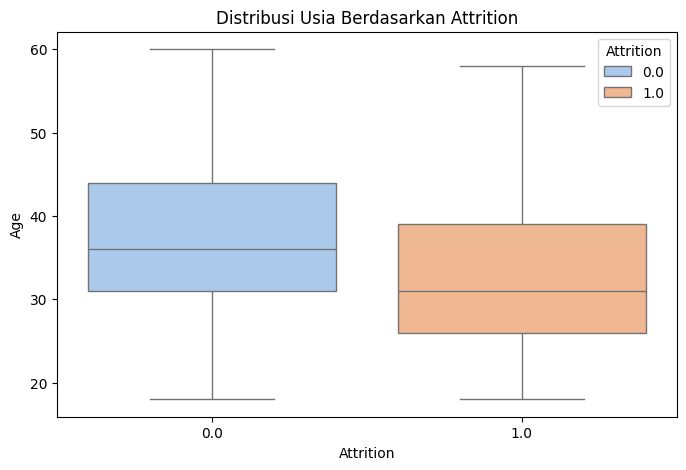

In [12]:
# Boxplot untuk Age

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='Age', hue='Attrition', palette="pastel")
plt.title("Distribusi Usia Berdasarkan Attrition")
plt.show()

**insight**

Usia para karyawan yang keluar cenderung secara signifikan lebih muda dibandingkan dengan karyawan yang bertahan.

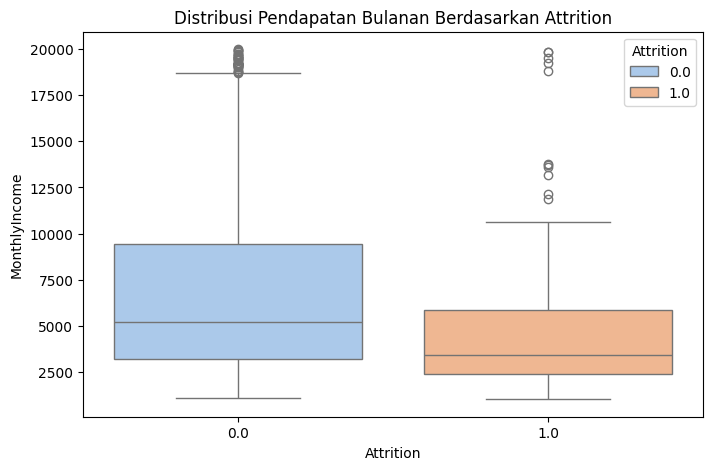

In [13]:
# Boxplot untuk MonthlyIncome

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', hue='Attrition', palette="pastel")
plt.title("Distribusi Pendapatan Bulanan Berdasarkan Attrition")
plt.show()


**Insight**

Pendapatan bulanan para karyawan yang keluar secara signifikan lebih rendah dibandingkan dengan karyawan yang bertahan.

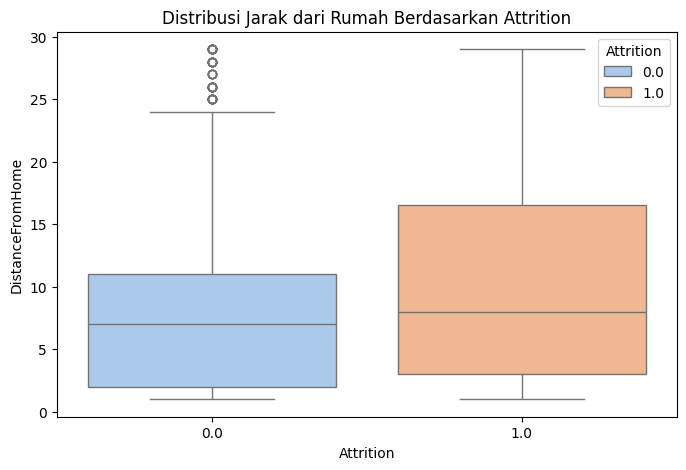

In [14]:
# Boxplot untuk DistanceFromHome

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', hue='Attrition', palette="pastel")
plt.title("Distribusi Jarak dari Rumah Berdasarkan Attrition")
plt.show()

**Insight**

Tempat tinggal Karyawan yang keluar jaraknya jauh dari kantor dibandingkan dengan karyawan yang bertahan.

### Distribusi `YearsAtCompany` dan `TotalWorkingYears`

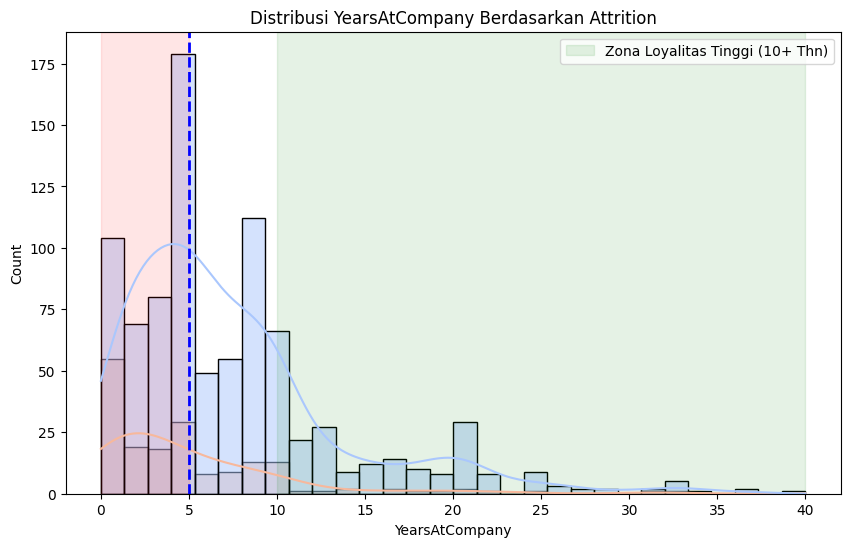

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="YearsAtCompany", hue="Attrition",
                  kde=True, palette="coolwarm", bins=30)

plt.title("Distribusi YearsAtCompany Berdasarkan Attrition")
plt.xlabel("YearsAtCompany")
plt.ylabel("Count")

# 1. Zona Risiko Tinggi (0-5 tahun)
# Area dengan kurva orange (attrition/keluar) paling dominan
ax.axvspan(xmin=0, xmax=5, color='red', alpha=0.1, label='Zona Risiko Tinggi Attrition (0-5 Thn)')

# 2. Puncak Karyawan Bertahan (di 5 tahun)
ax.axvline(x=5, color='blue', linestyle='--', linewidth=2, label='Puncak Karyawan Bertahan (5 Thn)')

# 3. Zona Loyalitas Tinggi (10+ tahun)
# Area di mana kurva orange (attrition/keluar) hampir tidak ada
ax.axvspan(xmin=10, xmax=df['YearsAtCompany'].max(), color='green', alpha=0.1, label='Zona Loyalitas Tinggi (10+ Thn)')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[2:], labels=labels[2:])

plt.show()

**Insight**

Risiko attrition (karyawan keluar) sangat didominasi pada 5 tahun pertama masa kerja. Setelah melewati batas 10 tahun, karyawan menjadi sangat loyal.

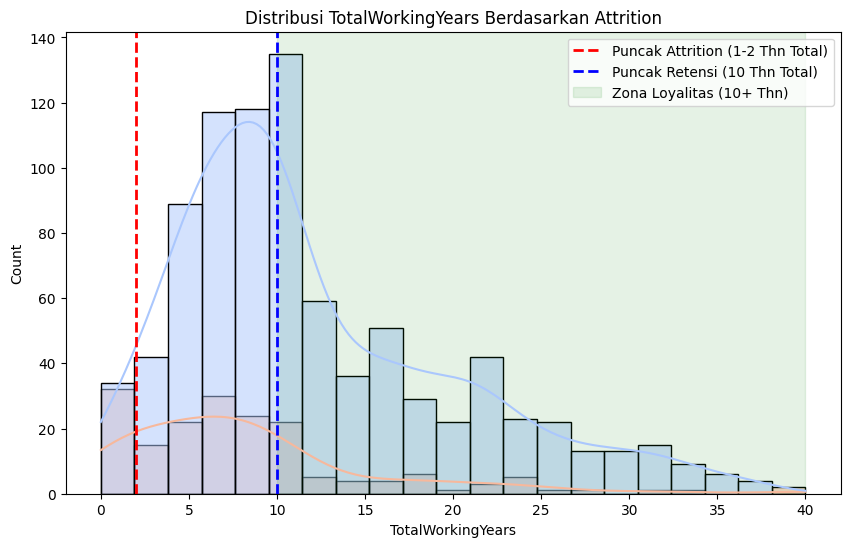

In [16]:
# Visualisasi distribusi TotalWorkingYears untuk Attrition
plt.figure(figsize=(10, 6))

# Tangkap plot sebagai 'ax' untuk anotasi
ax = sns.histplot(data=df, x="TotalWorkingYears", hue="Attrition",
                  kde=True, palette="coolwarm")

plt.title("Distribusi TotalWorkingYears Berdasarkan Attrition")
plt.xlabel("TotalWorkingYears")
plt.ylabel("Count")


# 1. Puncak Attrition (Keluar)
ax.axvline(x=2, color='red', linestyle='--', linewidth=2,
           label='Puncak Attrition (1-2 Thn Total)')

# 2. Puncak Retensi (Bertahan)
ax.axvline(x=10, color='blue', linestyle='--', linewidth=2,
           label='Puncak Retensi (10 Thn Total)')

# 3. Zona Loyalitas (10+ tahun)
ax.axvspan(xmin=10, xmax=df['TotalWorkingYears'].max(), color='green', alpha=0.1,
           label='Zona Loyalitas (10+ Thn)')
plt.legend()
plt.show()

**insight**

Karyawan dengan pengalaman kerja total yang masih sedikit (awal karir) adalah yang paling berisiko keluar, sementara karyawan yang sudah berpengalaman (10+ tahun) adalah yang paling loyal.

### Hubungan antara dua fitur utama dan bagaimana mereka berinteraksi dengan target Attrition

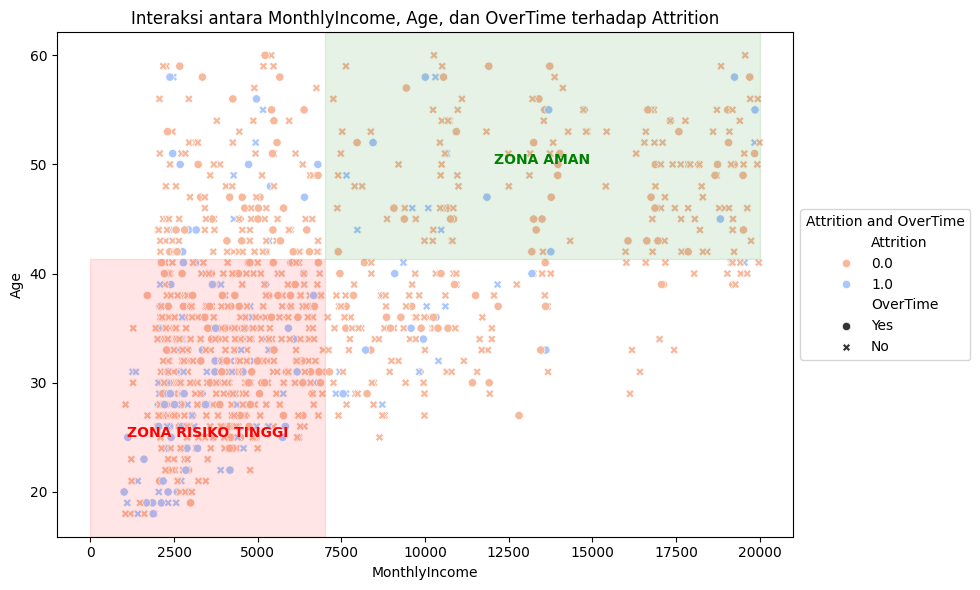

In [17]:
# Visualisasi interaksi antara MonthlyIncome dan OverTime terhadap Attrition
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=df, x="MonthlyIncome", y="Age", hue="Attrition",
                     style="OverTime", palette="coolwarm_r") # Ganti ke coolwarm_r agar 1.0=Merah

plt.title("Interaksi antara MonthlyIncome, Age, dan OverTime terhadap Attrition")
plt.xlabel("MonthlyIncome")
plt.ylabel("Age")
plt.legend(title="Attrition and OverTime", loc='center right', bbox_to_anchor=(1.25, 0.5))

# Batas untuk zona
GAJI_BATAS = 7000
USIA_BATAS = 40

# Zona 1: Zona Risiko Tinggi (Gaji Rendah, Usia Muda)
# axvspan untuk rentang Gaji, ymax untuk membatasi rentang Usia
ax.axvspan(xmin=0, xmax=GAJI_BATAS, ymin=0, ymax=0.55, # ymax=0.55 adalah ~40 thn
           color='red', alpha=0.1)
ax.text(GAJI_BATAS/2, 25, 'ZONA RISIKO TINGGI',
        horizontalalignment='center', color='red', weight='bold')

# Zona 2: Zona Aman (Gaji Tinggi, Usia Matang)
ax.axvspan(xmin=GAJI_BATAS, xmax=20000, ymin=0.55, ymax=1.0, # ymin=0.55 adalah ~40 thn
           color='green', alpha=0.1)
ax.text((GAJI_BATAS + 20000)/2, 50, 'ZONA AMAN',
        horizontalalignment='center', color='green', weight='bold')


plt.tight_layout()
plt.show()

**Insight**

1. **Zona Risiko Tinggi (Area Merah)**
Ini adalah kuadran kiri bawah (Usia < 40, Gaji < $7.500).

* **Konsentrasi Attrition:** Area ini dipenuhi oleh titik-titik orange (Attrition = 1.0). Ini membuktikan bahwa hampir semua karyawan yang keluar berasal dari kelompok usia muda dengan gaji rendah.

* **Peran OverTime:** Di dalam zona merah ini, perhatikan secara spesifik titik orange yang berbentuk titik (•). Bentuk titik berarti OverTime = Yes. Ada banyak sekali titik-titik ini, yang menunjukkan bahwa karyawan muda bergaji rendah yang juga sering lembur adalah kelompok yang paling mungkin untuk pergi.


2. **Zona Aman (Area Hijau)**
Ini adalah kuadran kanan atas (Usia > 40, Gaji > $7.500).

* **Konsentrasi Karyawan Bertahan:** Area ini didominasi oleh titik-titik biru (Attrition = 0.0). Hampir tidak ada karyawan yang keluar dari kelompok ini.

* **Peran OverTime:** Di dalam zona hijau ini, mayoritas bentuknya adalah silang (x) biru. Ini adalah profil karyawan Anda yang paling ideal dan stabil: Karyawan matang, bergaji tinggi, dan tidak perlu lembur (OverTime = No).

### Tingkat Kepuasan Karyawan

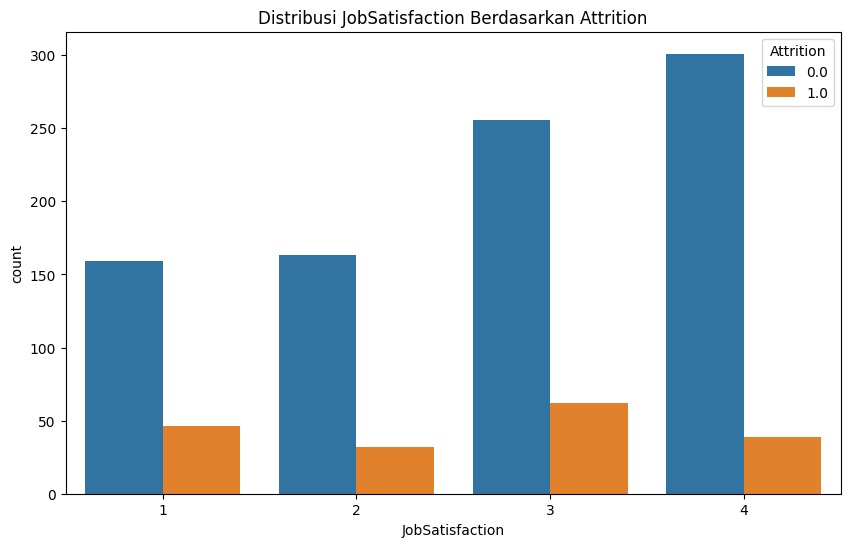

In [18]:
# Distribusi `JobSatisfaction` Berdasarkan `Attrition`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Distribusi JobSatisfaction Berdasarkan Attrition')
plt.show()

**insgth**

Karyawan dengan kepuasan kerja paling rendah (Level 1) memiliki risiko atau proporsi keluar (orange) paling tinggi dibandingkan dengan kelompok lain.

Meskipun jumlah karyawan yang keluar di Level 3 terlihat banyak, rasionya (dibandingkan batang birunya) masih lebih baik daripada Level 1.

Sebaliknya, karyawan dengan kepuasan kerja paling tinggi (Level 4) memiliki rasio keluar paling rendah, yang menunjukkan mereka adalah yang paling loyal.

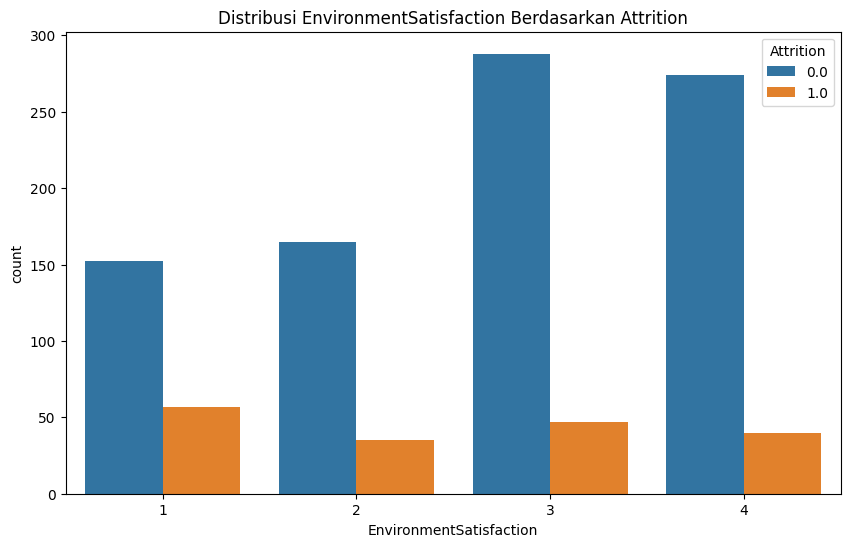

In [19]:
#Distribusi EnvironmentSatisfaction Berdasarkan Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Distribusi EnvironmentSatisfaction Berdasarkan Attrition')
plt.show()

**insight**

Ada korelasi negatif yang jelas antara kepuasan lingkungan kerja dan attrition. Karyawan dengan kepuasan lingkungan kerja paling rendah (Level 1) menunjukkan risiko atau proporsi keluar (oranye) yang paling tinggi secara signifikan.

Sebaliknya, karyawan dengan kepuasan lingkungan kerja paling tinggi (Level 4) memiliki proporsi keluar yang paling rendah.

Ini menunjukkan bahwa lingkungan kerja yang buruk adalah faktor pendorong kuat bagi karyawan untuk pergi.

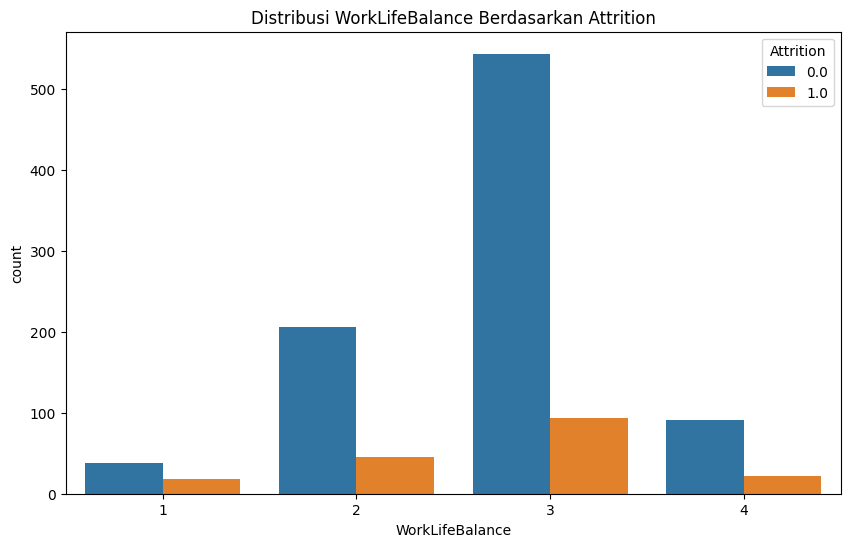

In [20]:
# Distribusi WorkLifeBalance Berdasarkan Attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Distribusi WorkLifeBalance Berdasarkan Attrition')
plt.show()

**Insight**

*Work-life balance* yang buruk adalah pendorong kuat attrition. Karyawan yang menilai *work-life balance* mereka paling rendah (Level 1) menunjukkan risiko keluar yang paling tinggi secara drastis, di mana rasio karyawan yang keluar hampir setengah dari yang bertahan.

Sebaliknya, Level 3, yang merupakan kategori paling umum, justru memiliki tingkat attrition proporsional yang paling rendah, menunjukkan bahwa karyawan yang merasa *WLB* mereka "Baik" adalah yang paling loyal.

## Analisis Fitur Kategorikal

In [21]:
# Distribusi Kolom Kategorikal
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## Modeling

## Evaluation